# Import the necessary modules

In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.constraints import maxnorm

pyplot.rcParams['figure.figsize'] = [15, 35]

Using TensorFlow backend.


# Collect and analyze the data

In [2]:
# load datasets
in_training_df = read_csv('input.training.txt', header=0)
in_training_values = in_training_df.values
in_test_df = read_csv('input.test.txt', header=0)
in_test_values = in_test_df.values
out_training_df = read_csv('output.training.txt', header=0)
out_training_values = out_training_df.values
out_test_df = read_csv('output.test.txt', header=0)
out_test_values = out_test_df.values

In [3]:
in_training_df.head()

,in1,in2,in3,in4,in5,in6,in7,in8,in9,in10,in11,in12,in13,in14,in15,in16,in17,in18,in19
0,0.220,77.702,0.007,0.297,124.273,0.012,0.611,168.297,0.027,0.931,236.211,0.112,1.0,279.294,0.193,1.0,502.991,0.341,2480.276
1,0.490,157.675,0.014,0.624,219.092,0.028,0.843,312.668,0.070,1.000,414.777,0.209,1.0,500.063,0.296,1.0,812.386,0.476,6079.950
2,0.344,64.225,0.011,0.486,88.656,0.033,0.679,208.484,0.082,0.971,394.516,0.188,1.0,479.672,0.287,1.0,634.578,0.464,4730.423
3,0.395,102.588,0.010,0.518,172.311,0.027,0.720,329.465,0.077,0.970,533.916,0.217,1.0,691.222,0.306,1.0,993.173,0.509,2373.559
4,0.403,115.397,0.015,0.485,178.645,0.028,0.766,259.988,0.055,1.000,367.119,0.153,1.0,442.339,0.239,1.0,629.582,0.386,4004.977


In [4]:
in_test_df.head()

,in1,in2,in3,in4,in5,in6,in7,in8,in9,in10,in11,in12,in13,in14,in15,in16,in17,in18,in19
0,0.455,133.062,0.014,0.645,204.883,0.031,0.841,341.320,0.073,1.000,462.289,0.204,1.000,589.656,0.293,1.0,780.333,0.513,1579.065
1,0.413,52.102,0.007,0.572,89.141,0.015,0.843,149.328,0.040,1.000,316.242,0.145,1.000,449.572,0.224,1.0,639.827,0.483,3229.238
2,0.451,65.987,0.005,0.533,132.133,0.010,0.681,206.516,0.036,0.988,315.688,0.143,1.000,393.016,0.211,1.0,566.208,0.377,1637.193
3,0.287,114.408,0.018,0.423,167.414,0.036,0.662,284.930,0.087,0.892,395.664,0.230,1.000,449.284,0.343,1.0,707.670,0.579,4540.462
4,0.400,146.866,0.017,0.531,194.268,0.039,0.743,262.176,0.089,0.931,404.668,0.201,0.998,498.414,0.284,1.0,782.899,0.451,3012.312


In [5]:
out_training_df.head()

,out1,out2,out3,out4,out5,out6,out7,out8,out9,out10,out11,out12,out13,out14
0,11225.016,49.690,6249.928,48.817,4142.659,47.978,2441.041,46.485,1062.341,43.292,469.898,38.774,284.934,35.354
1,10203.762,51.049,6252.731,49.672,4503.469,48.748,3055.971,47.127,1528.184,42.771,705.589,37.782,461.852,34.417
2,21280.286,49.688,10503.330,47.892,6217.448,46.601,3257.544,45.056,1431.881,41.764,691.558,37.014,455.506,33.571
3,13146.058,48.990,8112.534,47.735,5907.391,46.605,3832.171,44.780,1861.540,40.988,872.850,36.216,554.409,33.009
4,10223.702,50.459,6034.093,48.749,4236.997,47.579,2881.804,45.886,1405.747,41.817,597.814,37.169,400.215,34.063


In [6]:
out_test_df.head()

,out1,out2,out3,out4,out5,out6,out7,out8,out9,out10,out11,out12,out13,out14
0,13456.773,48.445,7891.745,47.063,5410.519,45.767,3376.623,43.859,1539.888,40.105,719.981,35.446,480.573,32.352
1,10855.780,50.201,6440.119,48.642,4376.430,47.533,2725.747,45.825,1256.478,42.191,569.397,37.363,361.795,34.136
2,9672.829,49.859,5809.461,48.844,4083.833,47.946,2572.771,46.372,1162.250,42.773,535.609,38.111,344.354,34.961
3,11779.252,50.777,7023.905,49.080,5064.772,47.870,3191.256,45.978,1419.605,42.137,652.382,37.520,422.642,34.314
4,11862.116,50.672,7230.823,48.807,5099.348,47.275,3099.861,45.170,1436.708,41.360,705.652,36.869,469.204,34.010


To begin with, let's verify the input variables. Graphic visualization is essential to make sure everything is in it's right place

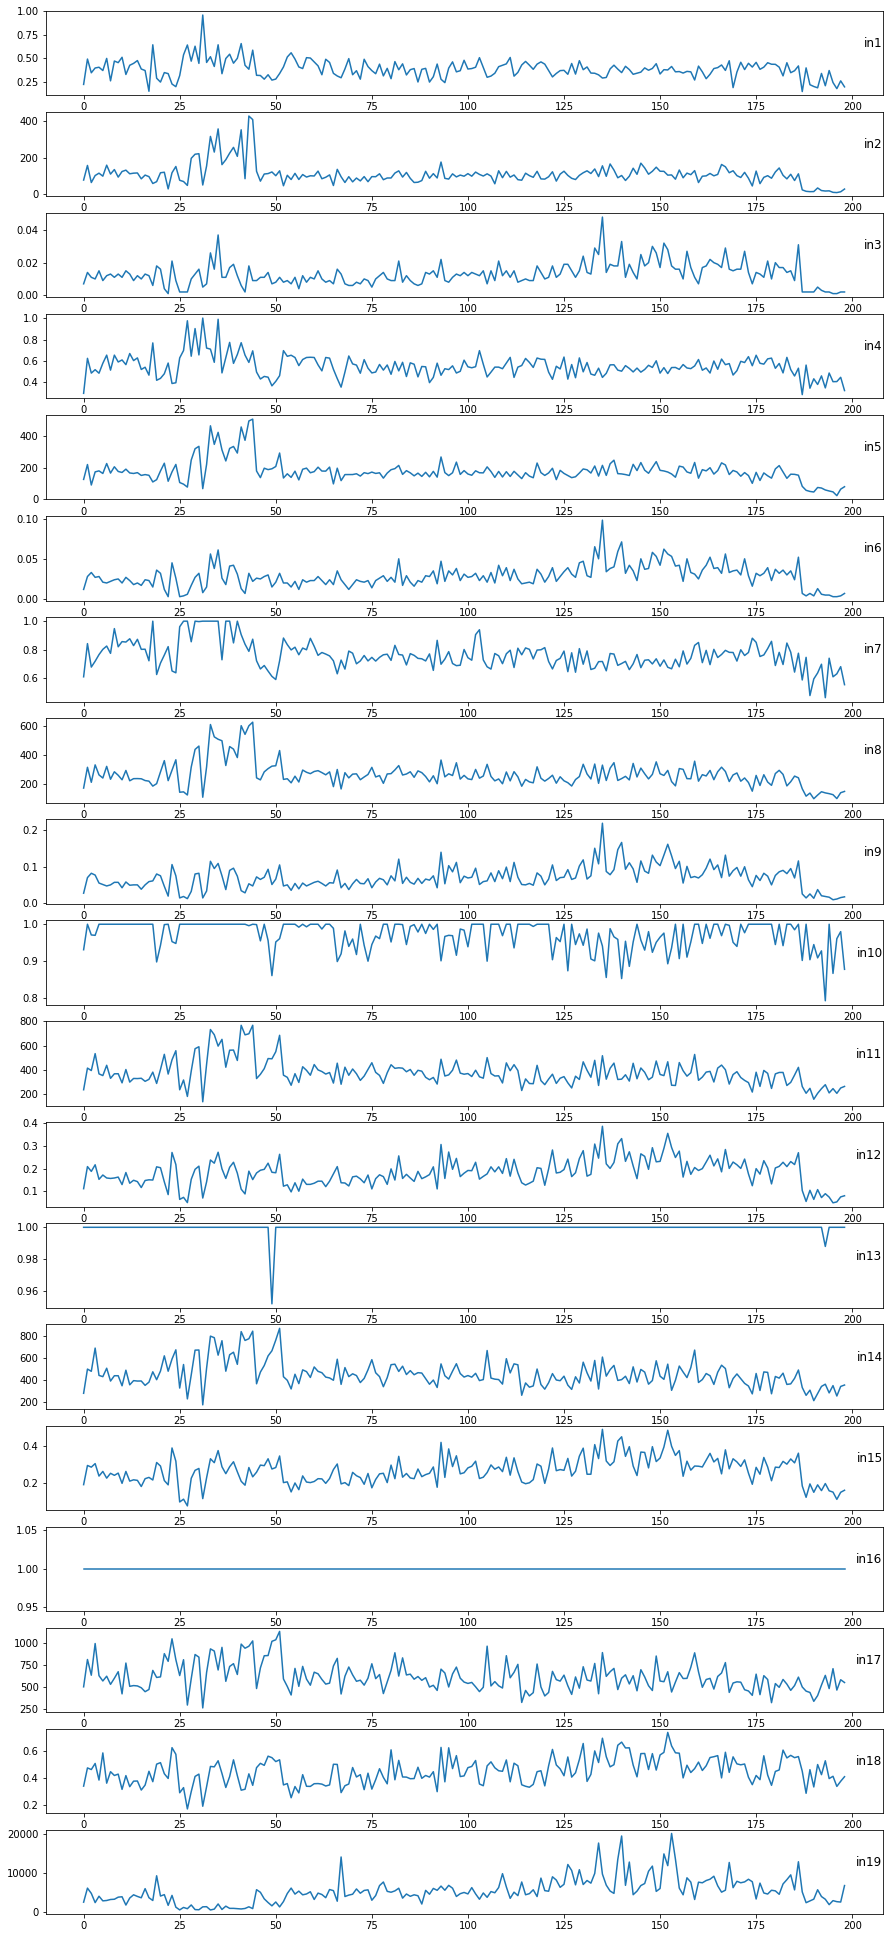

In [7]:
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(in_training_values[:, group])
    pyplot.title(in_training_df.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

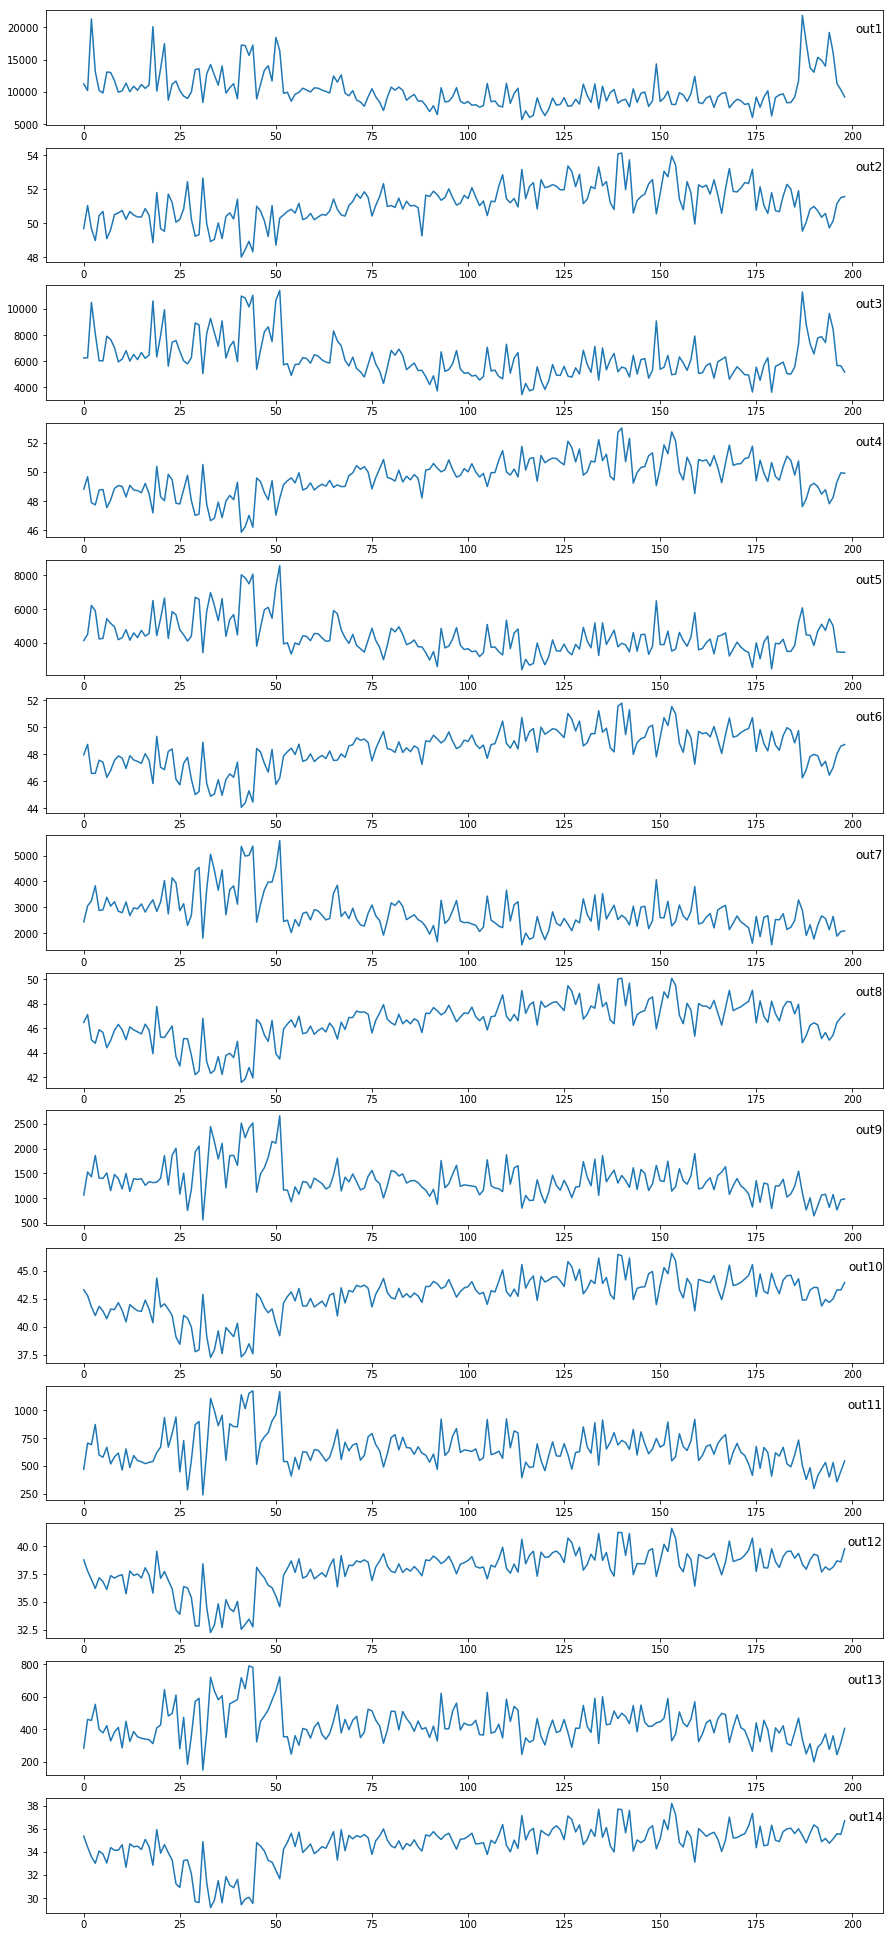

In [8]:
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(out_training_values[:, group])
    pyplot.title(out_training_df.columns[group], y=0.75, loc='right')
    i += 1
pyplot.show()

# LSTM data preparation

In [9]:
# Normalize features and ensure all data is float
# Normalization greatly improves performance
scaler = MinMaxScaler(feature_range=(0, 1))
in_training_values = scaler.fit_transform(in_training_values).astype('float32')
in_test_values = scaler.fit_transform(in_test_values).astype('float32')
out_training_values = scaler.fit_transform(out_training_values).astype('float32')
out_test_values = scaler.fit_transform(out_test_values).astype('float32')

# Define and Fit Models

In [10]:
# reshape input to be 3D [samples, timesteps, features], so that the 
in_training_values = in_training_values.reshape((in_training_values.shape[0], 1, in_training_values.shape[1]))
in_test_values = in_test_values.reshape((in_test_values.shape[0], 1, in_test_values.shape[1]))
print(in_training_values.shape, out_training_values.shape, in_test_values.shape, out_test_values.shape)

(199, 1, 19) (199, 14) (128, 1, 19) (128, 14)


In [11]:
# design network
sgd_model = Sequential()
sgd_model.add(LSTM(5, input_shape=(in_training_values.shape[1], in_training_values.shape[2])))
sgd_model.add(Dense(14))

sgd = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)
sgd_model.compile(loss='mean_squared_error', optimizer=sgd)
# fit network
history = sgd_model.fit(in_training_values, out_training_values, epochs=1000, batch_size=int(len(in_training_values)*0.5), validation_data=(in_test_values, out_test_values), verbose=2, shuffle=False)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 199 samples, validate on 128 samples
Epoch 1/1000
0s - loss: 0.2769 - val_loss: 0.2030
Epoch 2/1000
0s - loss: 0.2251 - val_loss: 0.1336
Epoch 3/1000
0s - loss: 0.1482 - val_loss: 0.0713
Epoch 4/1000
0s - loss: 0.0823 - val_loss: 0.0353
Epoch 5/1000
0s - loss: 0.0439 - val_loss: 0.0258
Epoch 6/1000
0s - loss: 0.0317 - val_loss: 0.0326
Epoch 7/1000
0s - loss: 0.0353 - val_loss: 0.0438
Epoch 8/1000
0s - loss: 0.0436 - val_loss: 0.0515
Epoch 9/1000
0s - loss: 0.0494 - val_loss: 0.0529
Epoch 10/1000
0s - loss: 0.0503 - val_loss: 0.0489
Epoch 11/1000
0s - loss: 0.0473 - val_loss: 0.0424
Epoch 12/1000
0s - loss: 0.0427 - val_loss: 0.0357
Epoch 13/1000
0s - loss: 0.0384 - val_loss: 0.0304
Epoch 14/1000
0s - loss: 0.0353 - val_loss: 0.0270
Epoch 15/1000
0s - loss: 0.0337 - val_loss: 0.0251
Epoch 16/1000
0s - loss: 0.0329 - val_loss: 0.0242
E

0s - loss: 0.0125 - val_loss: 0.0165
Epoch 164/1000
0s - loss: 0.0125 - val_loss: 0.0165
Epoch 165/1000
0s - loss: 0.0125 - val_loss: 0.0165
Epoch 166/1000
0s - loss: 0.0125 - val_loss: 0.0165
Epoch 167/1000
0s - loss: 0.0125 - val_loss: 0.0165
Epoch 168/1000
0s - loss: 0.0124 - val_loss: 0.0165
Epoch 169/1000
0s - loss: 0.0124 - val_loss: 0.0165
Epoch 170/1000
0s - loss: 0.0124 - val_loss: 0.0165
Epoch 171/1000
0s - loss: 0.0124 - val_loss: 0.0165
Epoch 172/1000
0s - loss: 0.0124 - val_loss: 0.0165
Epoch 173/1000
0s - loss: 0.0124 - val_loss: 0.0165
Epoch 174/1000
0s - loss: 0.0123 - val_loss: 0.0165
Epoch 175/1000
0s - loss: 0.0123 - val_loss: 0.0165
Epoch 176/1000
0s - loss: 0.0123 - val_loss: 0.0165
Epoch 177/1000
0s - loss: 0.0123 - val_loss: 0.0165
Epoch 178/1000
0s - loss: 0.0123 - val_loss: 0.0165
Epoch 179/1000
0s - loss: 0.0123 - val_loss: 0.0165
Epoch 180/1000
0s - loss: 0.0122 - val_loss: 0.0165
Epoch 181/1000
0s - loss: 0.0122 - val_loss: 0.0165
Epoch 182/1000
0s - loss: 0

0s - loss: 0.0099 - val_loss: 0.0162
Epoch 336/1000
0s - loss: 0.0099 - val_loss: 0.0162
Epoch 337/1000
0s - loss: 0.0099 - val_loss: 0.0162
Epoch 338/1000
0s - loss: 0.0099 - val_loss: 0.0162
Epoch 339/1000
0s - loss: 0.0098 - val_loss: 0.0162
Epoch 340/1000
0s - loss: 0.0098 - val_loss: 0.0162
Epoch 341/1000
0s - loss: 0.0098 - val_loss: 0.0162
Epoch 342/1000
0s - loss: 0.0098 - val_loss: 0.0162
Epoch 343/1000
0s - loss: 0.0098 - val_loss: 0.0162
Epoch 344/1000
0s - loss: 0.0098 - val_loss: 0.0162
Epoch 345/1000
0s - loss: 0.0098 - val_loss: 0.0162
Epoch 346/1000
0s - loss: 0.0097 - val_loss: 0.0162
Epoch 347/1000
0s - loss: 0.0097 - val_loss: 0.0162
Epoch 348/1000
0s - loss: 0.0097 - val_loss: 0.0162
Epoch 349/1000
0s - loss: 0.0097 - val_loss: 0.0162
Epoch 350/1000
0s - loss: 0.0097 - val_loss: 0.0162
Epoch 351/1000
0s - loss: 0.0097 - val_loss: 0.0162
Epoch 352/1000
0s - loss: 0.0097 - val_loss: 0.0162
Epoch 353/1000
0s - loss: 0.0097 - val_loss: 0.0162
Epoch 354/1000
0s - loss: 0

0s - loss: 0.0085 - val_loss: 0.0168
Epoch 507/1000
0s - loss: 0.0085 - val_loss: 0.0168
Epoch 508/1000
0s - loss: 0.0085 - val_loss: 0.0168
Epoch 509/1000
0s - loss: 0.0085 - val_loss: 0.0168
Epoch 510/1000
0s - loss: 0.0085 - val_loss: 0.0168
Epoch 511/1000
0s - loss: 0.0085 - val_loss: 0.0168
Epoch 512/1000
0s - loss: 0.0085 - val_loss: 0.0168
Epoch 513/1000
0s - loss: 0.0085 - val_loss: 0.0168
Epoch 514/1000
0s - loss: 0.0085 - val_loss: 0.0168
Epoch 515/1000
0s - loss: 0.0085 - val_loss: 0.0168
Epoch 516/1000
0s - loss: 0.0085 - val_loss: 0.0169
Epoch 517/1000
0s - loss: 0.0085 - val_loss: 0.0169
Epoch 518/1000
0s - loss: 0.0085 - val_loss: 0.0169
Epoch 519/1000
0s - loss: 0.0085 - val_loss: 0.0169
Epoch 520/1000
0s - loss: 0.0085 - val_loss: 0.0169
Epoch 521/1000
0s - loss: 0.0085 - val_loss: 0.0169
Epoch 522/1000
0s - loss: 0.0085 - val_loss: 0.0169
Epoch 523/1000
0s - loss: 0.0085 - val_loss: 0.0169
Epoch 524/1000
0s - loss: 0.0085 - val_loss: 0.0169
Epoch 525/1000
0s - loss: 0

0s - loss: 0.0082 - val_loss: 0.0172
Epoch 679/1000
0s - loss: 0.0082 - val_loss: 0.0172
Epoch 680/1000
0s - loss: 0.0082 - val_loss: 0.0172
Epoch 681/1000
0s - loss: 0.0082 - val_loss: 0.0172
Epoch 682/1000
0s - loss: 0.0082 - val_loss: 0.0172
Epoch 683/1000
0s - loss: 0.0082 - val_loss: 0.0172
Epoch 684/1000
0s - loss: 0.0082 - val_loss: 0.0172
Epoch 685/1000
0s - loss: 0.0082 - val_loss: 0.0172
Epoch 686/1000
0s - loss: 0.0082 - val_loss: 0.0172
Epoch 687/1000
0s - loss: 0.0082 - val_loss: 0.0172
Epoch 688/1000
0s - loss: 0.0082 - val_loss: 0.0172
Epoch 689/1000
0s - loss: 0.0082 - val_loss: 0.0172
Epoch 690/1000
0s - loss: 0.0082 - val_loss: 0.0172
Epoch 691/1000
0s - loss: 0.0081 - val_loss: 0.0172
Epoch 692/1000
0s - loss: 0.0081 - val_loss: 0.0172
Epoch 693/1000
0s - loss: 0.0081 - val_loss: 0.0172
Epoch 694/1000
0s - loss: 0.0081 - val_loss: 0.0172
Epoch 695/1000
0s - loss: 0.0081 - val_loss: 0.0172
Epoch 696/1000
0s - loss: 0.0081 - val_loss: 0.0172
Epoch 697/1000
0s - loss: 0

0s - loss: 0.0079 - val_loss: 0.0171
Epoch 843/1000
0s - loss: 0.0079 - val_loss: 0.0171
Epoch 844/1000
0s - loss: 0.0079 - val_loss: 0.0171
Epoch 845/1000
0s - loss: 0.0079 - val_loss: 0.0171
Epoch 846/1000
0s - loss: 0.0079 - val_loss: 0.0171
Epoch 847/1000
0s - loss: 0.0079 - val_loss: 0.0171
Epoch 848/1000
0s - loss: 0.0079 - val_loss: 0.0171
Epoch 849/1000
0s - loss: 0.0079 - val_loss: 0.0171
Epoch 850/1000
0s - loss: 0.0079 - val_loss: 0.0171
Epoch 851/1000
0s - loss: 0.0079 - val_loss: 0.0171
Epoch 852/1000
0s - loss: 0.0079 - val_loss: 0.0171
Epoch 853/1000
0s - loss: 0.0079 - val_loss: 0.0171
Epoch 854/1000
0s - loss: 0.0079 - val_loss: 0.0171
Epoch 855/1000
0s - loss: 0.0079 - val_loss: 0.0171
Epoch 856/1000
0s - loss: 0.0079 - val_loss: 0.0171
Epoch 857/1000
0s - loss: 0.0079 - val_loss: 0.0171
Epoch 858/1000
0s - loss: 0.0079 - val_loss: 0.0171
Epoch 859/1000
0s - loss: 0.0079 - val_loss: 0.0171
Epoch 860/1000
0s - loss: 0.0079 - val_loss: 0.0171
Epoch 861/1000
0s - loss: 0

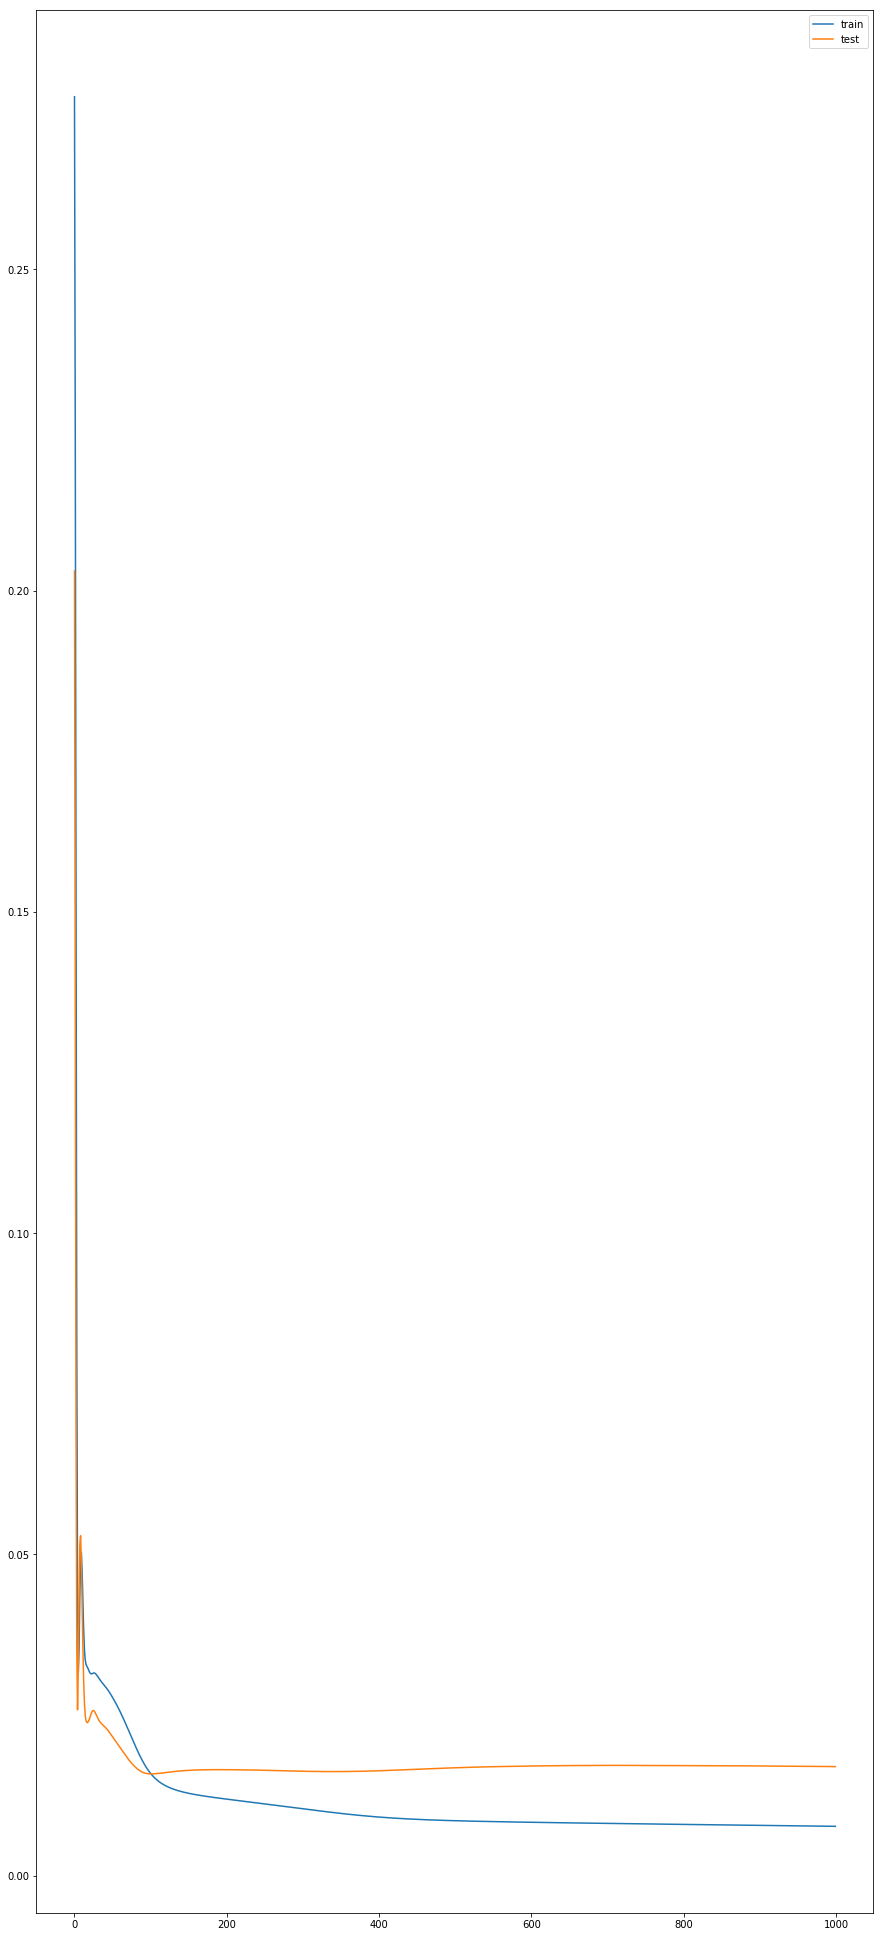

In [12]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [13]:
# design network
adam_model = Sequential()
adam_model.add(LSTM(3, input_shape=(in_training_values.shape[1], in_training_values.shape[2])))
adam_model.add(Dense(14))

adam_model.compile(loss='mean_squared_error', optimizer='adam')
# fit network
history = adam_model.fit(in_training_values, out_training_values, epochs=2000, batch_size=int(len(in_training_values)*0.5), validation_data=(in_test_values, out_test_values), verbose=2, shuffle=False)

Train on 199 samples, validate on 128 samples
Epoch 1/2000
0s - loss: 0.2985 - val_loss: 0.2382
Epoch 2/2000
0s - loss: 0.2924 - val_loss: 0.2331
Epoch 3/2000
0s - loss: 0.2865 - val_loss: 0.2283
Epoch 4/2000
0s - loss: 0.2810 - val_loss: 0.2238
Epoch 5/2000
0s - loss: 0.2756 - val_loss: 0.2194
Epoch 6/2000
0s - loss: 0.2704 - val_loss: 0.2151
Epoch 7/2000
0s - loss: 0.2655 - val_loss: 0.2111
Epoch 8/2000
0s - loss: 0.2608 - val_loss: 0.2073
Epoch 9/2000
0s - loss: 0.2563 - val_loss: 0.2037
Epoch 10/2000
0s - loss: 0.2519 - val_loss: 0.2001
Epoch 11/2000
0s - loss: 0.2478 - val_loss: 0.1968
Epoch 12/2000
0s - loss: 0.2438 - val_loss: 0.1936
Epoch 13/2000
0s - loss: 0.2400 - val_loss: 0.1905
Epoch 14/2000
0s - loss: 0.2363 - val_loss: 0.1875
Epoch 15/2000
0s - loss: 0.2328 - val_loss: 0.1846
Epoch 16/2000
0s - loss: 0.2294 - val_loss: 0.1818
Epoch 17/2000
0s - loss: 0.2260 - val_loss: 0.1791
Epoch 18/2000
0s - loss: 0.2228 - val_loss: 0.1764
Epoch 19/2000
0s - loss: 0.2196 - val_loss: 0

0s - loss: 0.0311 - val_loss: 0.0299
Epoch 162/2000
0s - loss: 0.0310 - val_loss: 0.0298
Epoch 163/2000
0s - loss: 0.0310 - val_loss: 0.0297
Epoch 164/2000
0s - loss: 0.0309 - val_loss: 0.0296
Epoch 165/2000
0s - loss: 0.0308 - val_loss: 0.0295
Epoch 166/2000
0s - loss: 0.0307 - val_loss: 0.0294
Epoch 167/2000
0s - loss: 0.0306 - val_loss: 0.0294
Epoch 168/2000
0s - loss: 0.0305 - val_loss: 0.0293
Epoch 169/2000
0s - loss: 0.0304 - val_loss: 0.0292
Epoch 170/2000
0s - loss: 0.0304 - val_loss: 0.0291
Epoch 171/2000
0s - loss: 0.0303 - val_loss: 0.0290
Epoch 172/2000
0s - loss: 0.0302 - val_loss: 0.0289
Epoch 173/2000
0s - loss: 0.0301 - val_loss: 0.0288
Epoch 174/2000
0s - loss: 0.0301 - val_loss: 0.0288
Epoch 175/2000
0s - loss: 0.0300 - val_loss: 0.0287
Epoch 176/2000
0s - loss: 0.0299 - val_loss: 0.0286
Epoch 177/2000
0s - loss: 0.0298 - val_loss: 0.0285
Epoch 178/2000
0s - loss: 0.0298 - val_loss: 0.0284
Epoch 179/2000
0s - loss: 0.0297 - val_loss: 0.0284
Epoch 180/2000
0s - loss: 0

0s - loss: 0.0216 - val_loss: 0.0216
Epoch 320/2000
0s - loss: 0.0215 - val_loss: 0.0216
Epoch 321/2000
0s - loss: 0.0215 - val_loss: 0.0216
Epoch 322/2000
0s - loss: 0.0214 - val_loss: 0.0215
Epoch 323/2000
0s - loss: 0.0214 - val_loss: 0.0215
Epoch 324/2000
0s - loss: 0.0213 - val_loss: 0.0214
Epoch 325/2000
0s - loss: 0.0212 - val_loss: 0.0214
Epoch 326/2000
0s - loss: 0.0212 - val_loss: 0.0214
Epoch 327/2000
0s - loss: 0.0211 - val_loss: 0.0213
Epoch 328/2000
0s - loss: 0.0211 - val_loss: 0.0213
Epoch 329/2000
0s - loss: 0.0210 - val_loss: 0.0213
Epoch 330/2000
0s - loss: 0.0210 - val_loss: 0.0212
Epoch 331/2000
0s - loss: 0.0209 - val_loss: 0.0212
Epoch 332/2000
0s - loss: 0.0209 - val_loss: 0.0211
Epoch 333/2000
0s - loss: 0.0208 - val_loss: 0.0211
Epoch 334/2000
0s - loss: 0.0208 - val_loss: 0.0211
Epoch 335/2000
0s - loss: 0.0207 - val_loss: 0.0210
Epoch 336/2000
0s - loss: 0.0206 - val_loss: 0.0210
Epoch 337/2000
0s - loss: 0.0206 - val_loss: 0.0210
Epoch 338/2000
0s - loss: 0

0s - loss: 0.0146 - val_loss: 0.0164
Epoch 487/2000
0s - loss: 0.0145 - val_loss: 0.0163
Epoch 488/2000
0s - loss: 0.0145 - val_loss: 0.0163
Epoch 489/2000
0s - loss: 0.0145 - val_loss: 0.0163
Epoch 490/2000
0s - loss: 0.0144 - val_loss: 0.0163
Epoch 491/2000
0s - loss: 0.0144 - val_loss: 0.0162
Epoch 492/2000
0s - loss: 0.0144 - val_loss: 0.0162
Epoch 493/2000
0s - loss: 0.0144 - val_loss: 0.0162
Epoch 494/2000
0s - loss: 0.0143 - val_loss: 0.0162
Epoch 495/2000
0s - loss: 0.0143 - val_loss: 0.0161
Epoch 496/2000
0s - loss: 0.0143 - val_loss: 0.0161
Epoch 497/2000
0s - loss: 0.0143 - val_loss: 0.0161
Epoch 498/2000
0s - loss: 0.0142 - val_loss: 0.0161
Epoch 499/2000
0s - loss: 0.0142 - val_loss: 0.0161
Epoch 500/2000
0s - loss: 0.0142 - val_loss: 0.0160
Epoch 501/2000
0s - loss: 0.0142 - val_loss: 0.0160
Epoch 502/2000
0s - loss: 0.0141 - val_loss: 0.0160
Epoch 503/2000
0s - loss: 0.0141 - val_loss: 0.0160
Epoch 504/2000
0s - loss: 0.0141 - val_loss: 0.0159
Epoch 505/2000
0s - loss: 0

0s - loss: 0.0115 - val_loss: 0.0138
Epoch 649/2000
0s - loss: 0.0115 - val_loss: 0.0138
Epoch 650/2000
0s - loss: 0.0115 - val_loss: 0.0138
Epoch 651/2000
0s - loss: 0.0114 - val_loss: 0.0137
Epoch 652/2000
0s - loss: 0.0114 - val_loss: 0.0137
Epoch 653/2000
0s - loss: 0.0114 - val_loss: 0.0137
Epoch 654/2000
0s - loss: 0.0114 - val_loss: 0.0137
Epoch 655/2000
0s - loss: 0.0114 - val_loss: 0.0137
Epoch 656/2000
0s - loss: 0.0114 - val_loss: 0.0137
Epoch 657/2000
0s - loss: 0.0114 - val_loss: 0.0137
Epoch 658/2000
0s - loss: 0.0114 - val_loss: 0.0137
Epoch 659/2000
0s - loss: 0.0113 - val_loss: 0.0137
Epoch 660/2000
0s - loss: 0.0113 - val_loss: 0.0137
Epoch 661/2000
0s - loss: 0.0113 - val_loss: 0.0136
Epoch 662/2000
0s - loss: 0.0113 - val_loss: 0.0136
Epoch 663/2000
0s - loss: 0.0113 - val_loss: 0.0136
Epoch 664/2000
0s - loss: 0.0113 - val_loss: 0.0136
Epoch 665/2000
0s - loss: 0.0113 - val_loss: 0.0136
Epoch 666/2000
0s - loss: 0.0113 - val_loss: 0.0136
Epoch 667/2000
0s - loss: 0

0s - loss: 0.0100 - val_loss: 0.0127
Epoch 812/2000
0s - loss: 0.0100 - val_loss: 0.0127
Epoch 813/2000
0s - loss: 0.0100 - val_loss: 0.0127
Epoch 814/2000
0s - loss: 0.0100 - val_loss: 0.0127
Epoch 815/2000
0s - loss: 0.0100 - val_loss: 0.0127
Epoch 816/2000
0s - loss: 0.0100 - val_loss: 0.0127
Epoch 817/2000
0s - loss: 0.0099 - val_loss: 0.0127
Epoch 818/2000
0s - loss: 0.0099 - val_loss: 0.0127
Epoch 819/2000
0s - loss: 0.0099 - val_loss: 0.0127
Epoch 820/2000
0s - loss: 0.0099 - val_loss: 0.0127
Epoch 821/2000
0s - loss: 0.0099 - val_loss: 0.0127
Epoch 822/2000
0s - loss: 0.0099 - val_loss: 0.0127
Epoch 823/2000
0s - loss: 0.0099 - val_loss: 0.0127
Epoch 824/2000
0s - loss: 0.0099 - val_loss: 0.0127
Epoch 825/2000
0s - loss: 0.0099 - val_loss: 0.0127
Epoch 826/2000
0s - loss: 0.0099 - val_loss: 0.0127
Epoch 827/2000
0s - loss: 0.0099 - val_loss: 0.0127
Epoch 828/2000
0s - loss: 0.0099 - val_loss: 0.0127
Epoch 829/2000
0s - loss: 0.0099 - val_loss: 0.0127
Epoch 830/2000
0s - loss: 0

0s - loss: 0.0092 - val_loss: 0.0124
Epoch 974/2000
0s - loss: 0.0092 - val_loss: 0.0124
Epoch 975/2000
0s - loss: 0.0092 - val_loss: 0.0124
Epoch 976/2000
0s - loss: 0.0092 - val_loss: 0.0124
Epoch 977/2000
0s - loss: 0.0091 - val_loss: 0.0124
Epoch 978/2000
0s - loss: 0.0091 - val_loss: 0.0124
Epoch 979/2000
0s - loss: 0.0091 - val_loss: 0.0124
Epoch 980/2000
0s - loss: 0.0091 - val_loss: 0.0124
Epoch 981/2000
0s - loss: 0.0091 - val_loss: 0.0124
Epoch 982/2000
0s - loss: 0.0091 - val_loss: 0.0124
Epoch 983/2000
0s - loss: 0.0091 - val_loss: 0.0124
Epoch 984/2000
0s - loss: 0.0091 - val_loss: 0.0124
Epoch 985/2000
0s - loss: 0.0091 - val_loss: 0.0124
Epoch 986/2000
0s - loss: 0.0091 - val_loss: 0.0124
Epoch 987/2000
0s - loss: 0.0091 - val_loss: 0.0124
Epoch 988/2000
0s - loss: 0.0091 - val_loss: 0.0124
Epoch 989/2000
0s - loss: 0.0091 - val_loss: 0.0124
Epoch 990/2000
0s - loss: 0.0091 - val_loss: 0.0124
Epoch 991/2000
0s - loss: 0.0091 - val_loss: 0.0124
Epoch 992/2000
0s - loss: 0

0s - loss: 0.0086 - val_loss: 0.0124
Epoch 1133/2000
0s - loss: 0.0086 - val_loss: 0.0124
Epoch 1134/2000
0s - loss: 0.0086 - val_loss: 0.0124
Epoch 1135/2000
0s - loss: 0.0086 - val_loss: 0.0124
Epoch 1136/2000
0s - loss: 0.0086 - val_loss: 0.0124
Epoch 1137/2000
0s - loss: 0.0086 - val_loss: 0.0124
Epoch 1138/2000
0s - loss: 0.0086 - val_loss: 0.0124
Epoch 1139/2000
0s - loss: 0.0086 - val_loss: 0.0124
Epoch 1140/2000
0s - loss: 0.0086 - val_loss: 0.0124
Epoch 1141/2000
0s - loss: 0.0086 - val_loss: 0.0124
Epoch 1142/2000
0s - loss: 0.0086 - val_loss: 0.0124
Epoch 1143/2000
0s - loss: 0.0086 - val_loss: 0.0124
Epoch 1144/2000
0s - loss: 0.0086 - val_loss: 0.0124
Epoch 1145/2000
0s - loss: 0.0086 - val_loss: 0.0124
Epoch 1146/2000
0s - loss: 0.0086 - val_loss: 0.0124
Epoch 1147/2000
0s - loss: 0.0086 - val_loss: 0.0124
Epoch 1148/2000
0s - loss: 0.0086 - val_loss: 0.0124
Epoch 1149/2000
0s - loss: 0.0086 - val_loss: 0.0124
Epoch 1150/2000
0s - loss: 0.0086 - val_loss: 0.0124
Epoch 115

0s - loss: 0.0081 - val_loss: 0.0126
Epoch 1299/2000
0s - loss: 0.0081 - val_loss: 0.0126
Epoch 1300/2000
0s - loss: 0.0081 - val_loss: 0.0126
Epoch 1301/2000
0s - loss: 0.0081 - val_loss: 0.0126
Epoch 1302/2000
0s - loss: 0.0081 - val_loss: 0.0126
Epoch 1303/2000
0s - loss: 0.0081 - val_loss: 0.0126
Epoch 1304/2000
0s - loss: 0.0081 - val_loss: 0.0126
Epoch 1305/2000
0s - loss: 0.0081 - val_loss: 0.0126
Epoch 1306/2000
0s - loss: 0.0081 - val_loss: 0.0126
Epoch 1307/2000
0s - loss: 0.0081 - val_loss: 0.0126
Epoch 1308/2000
0s - loss: 0.0081 - val_loss: 0.0126
Epoch 1309/2000
0s - loss: 0.0081 - val_loss: 0.0126
Epoch 1310/2000
0s - loss: 0.0081 - val_loss: 0.0126
Epoch 1311/2000
0s - loss: 0.0081 - val_loss: 0.0126
Epoch 1312/2000
0s - loss: 0.0081 - val_loss: 0.0126
Epoch 1313/2000
0s - loss: 0.0081 - val_loss: 0.0126
Epoch 1314/2000
0s - loss: 0.0081 - val_loss: 0.0126
Epoch 1315/2000
0s - loss: 0.0081 - val_loss: 0.0126
Epoch 1316/2000
0s - loss: 0.0081 - val_loss: 0.0126
Epoch 131

0s - loss: 0.0077 - val_loss: 0.0128
Epoch 1461/2000
0s - loss: 0.0077 - val_loss: 0.0128
Epoch 1462/2000
0s - loss: 0.0077 - val_loss: 0.0128
Epoch 1463/2000
0s - loss: 0.0077 - val_loss: 0.0128
Epoch 1464/2000
0s - loss: 0.0077 - val_loss: 0.0128
Epoch 1465/2000
0s - loss: 0.0077 - val_loss: 0.0128
Epoch 1466/2000
0s - loss: 0.0077 - val_loss: 0.0128
Epoch 1467/2000
0s - loss: 0.0077 - val_loss: 0.0128
Epoch 1468/2000
0s - loss: 0.0077 - val_loss: 0.0128
Epoch 1469/2000
0s - loss: 0.0077 - val_loss: 0.0128
Epoch 1470/2000
0s - loss: 0.0077 - val_loss: 0.0128
Epoch 1471/2000
0s - loss: 0.0077 - val_loss: 0.0128
Epoch 1472/2000
0s - loss: 0.0077 - val_loss: 0.0128
Epoch 1473/2000
0s - loss: 0.0077 - val_loss: 0.0128
Epoch 1474/2000
0s - loss: 0.0077 - val_loss: 0.0128
Epoch 1475/2000
0s - loss: 0.0077 - val_loss: 0.0128
Epoch 1476/2000
0s - loss: 0.0077 - val_loss: 0.0128
Epoch 1477/2000
0s - loss: 0.0077 - val_loss: 0.0128
Epoch 1478/2000
0s - loss: 0.0077 - val_loss: 0.0128
Epoch 147

0s - loss: 0.0074 - val_loss: 0.0128
Epoch 1627/2000
0s - loss: 0.0074 - val_loss: 0.0128
Epoch 1628/2000
0s - loss: 0.0074 - val_loss: 0.0128
Epoch 1629/2000
0s - loss: 0.0074 - val_loss: 0.0128
Epoch 1630/2000
0s - loss: 0.0074 - val_loss: 0.0129
Epoch 1631/2000
0s - loss: 0.0074 - val_loss: 0.0129
Epoch 1632/2000
0s - loss: 0.0074 - val_loss: 0.0129
Epoch 1633/2000
0s - loss: 0.0074 - val_loss: 0.0129
Epoch 1634/2000
0s - loss: 0.0074 - val_loss: 0.0129
Epoch 1635/2000
0s - loss: 0.0074 - val_loss: 0.0129
Epoch 1636/2000
0s - loss: 0.0074 - val_loss: 0.0129
Epoch 1637/2000
0s - loss: 0.0074 - val_loss: 0.0129
Epoch 1638/2000
0s - loss: 0.0074 - val_loss: 0.0129
Epoch 1639/2000
0s - loss: 0.0074 - val_loss: 0.0129
Epoch 1640/2000
0s - loss: 0.0074 - val_loss: 0.0129
Epoch 1641/2000
0s - loss: 0.0074 - val_loss: 0.0129
Epoch 1642/2000
0s - loss: 0.0074 - val_loss: 0.0129
Epoch 1643/2000
0s - loss: 0.0074 - val_loss: 0.0129
Epoch 1644/2000
0s - loss: 0.0074 - val_loss: 0.0129
Epoch 164

0s - loss: 0.0071 - val_loss: 0.0130
Epoch 1795/2000
0s - loss: 0.0071 - val_loss: 0.0130
Epoch 1796/2000
0s - loss: 0.0071 - val_loss: 0.0130
Epoch 1797/2000
0s - loss: 0.0071 - val_loss: 0.0130
Epoch 1798/2000
0s - loss: 0.0071 - val_loss: 0.0130
Epoch 1799/2000
0s - loss: 0.0071 - val_loss: 0.0130
Epoch 1800/2000
0s - loss: 0.0071 - val_loss: 0.0130
Epoch 1801/2000
0s - loss: 0.0071 - val_loss: 0.0130
Epoch 1802/2000
0s - loss: 0.0071 - val_loss: 0.0130
Epoch 1803/2000
0s - loss: 0.0071 - val_loss: 0.0130
Epoch 1804/2000
0s - loss: 0.0071 - val_loss: 0.0130
Epoch 1805/2000
0s - loss: 0.0071 - val_loss: 0.0130
Epoch 1806/2000
0s - loss: 0.0071 - val_loss: 0.0130
Epoch 1807/2000
0s - loss: 0.0071 - val_loss: 0.0130
Epoch 1808/2000
0s - loss: 0.0071 - val_loss: 0.0130
Epoch 1809/2000
0s - loss: 0.0071 - val_loss: 0.0130
Epoch 1810/2000
0s - loss: 0.0071 - val_loss: 0.0130
Epoch 1811/2000
0s - loss: 0.0071 - val_loss: 0.0130
Epoch 1812/2000
0s - loss: 0.0071 - val_loss: 0.0130
Epoch 181

0s - loss: 0.0069 - val_loss: 0.0133
Epoch 1964/2000
0s - loss: 0.0069 - val_loss: 0.0133
Epoch 1965/2000
0s - loss: 0.0069 - val_loss: 0.0133
Epoch 1966/2000
0s - loss: 0.0069 - val_loss: 0.0133
Epoch 1967/2000
0s - loss: 0.0069 - val_loss: 0.0133
Epoch 1968/2000
0s - loss: 0.0069 - val_loss: 0.0133
Epoch 1969/2000
0s - loss: 0.0069 - val_loss: 0.0133
Epoch 1970/2000
0s - loss: 0.0069 - val_loss: 0.0133
Epoch 1971/2000
0s - loss: 0.0069 - val_loss: 0.0133
Epoch 1972/2000
0s - loss: 0.0069 - val_loss: 0.0133
Epoch 1973/2000
0s - loss: 0.0069 - val_loss: 0.0133
Epoch 1974/2000
0s - loss: 0.0069 - val_loss: 0.0133
Epoch 1975/2000
0s - loss: 0.0069 - val_loss: 0.0133
Epoch 1976/2000
0s - loss: 0.0069 - val_loss: 0.0133
Epoch 1977/2000
0s - loss: 0.0069 - val_loss: 0.0133
Epoch 1978/2000
0s - loss: 0.0069 - val_loss: 0.0133
Epoch 1979/2000
0s - loss: 0.0069 - val_loss: 0.0133
Epoch 1980/2000
0s - loss: 0.0069 - val_loss: 0.0133
Epoch 1981/2000
0s - loss: 0.0069 - val_loss: 0.0133
Epoch 198

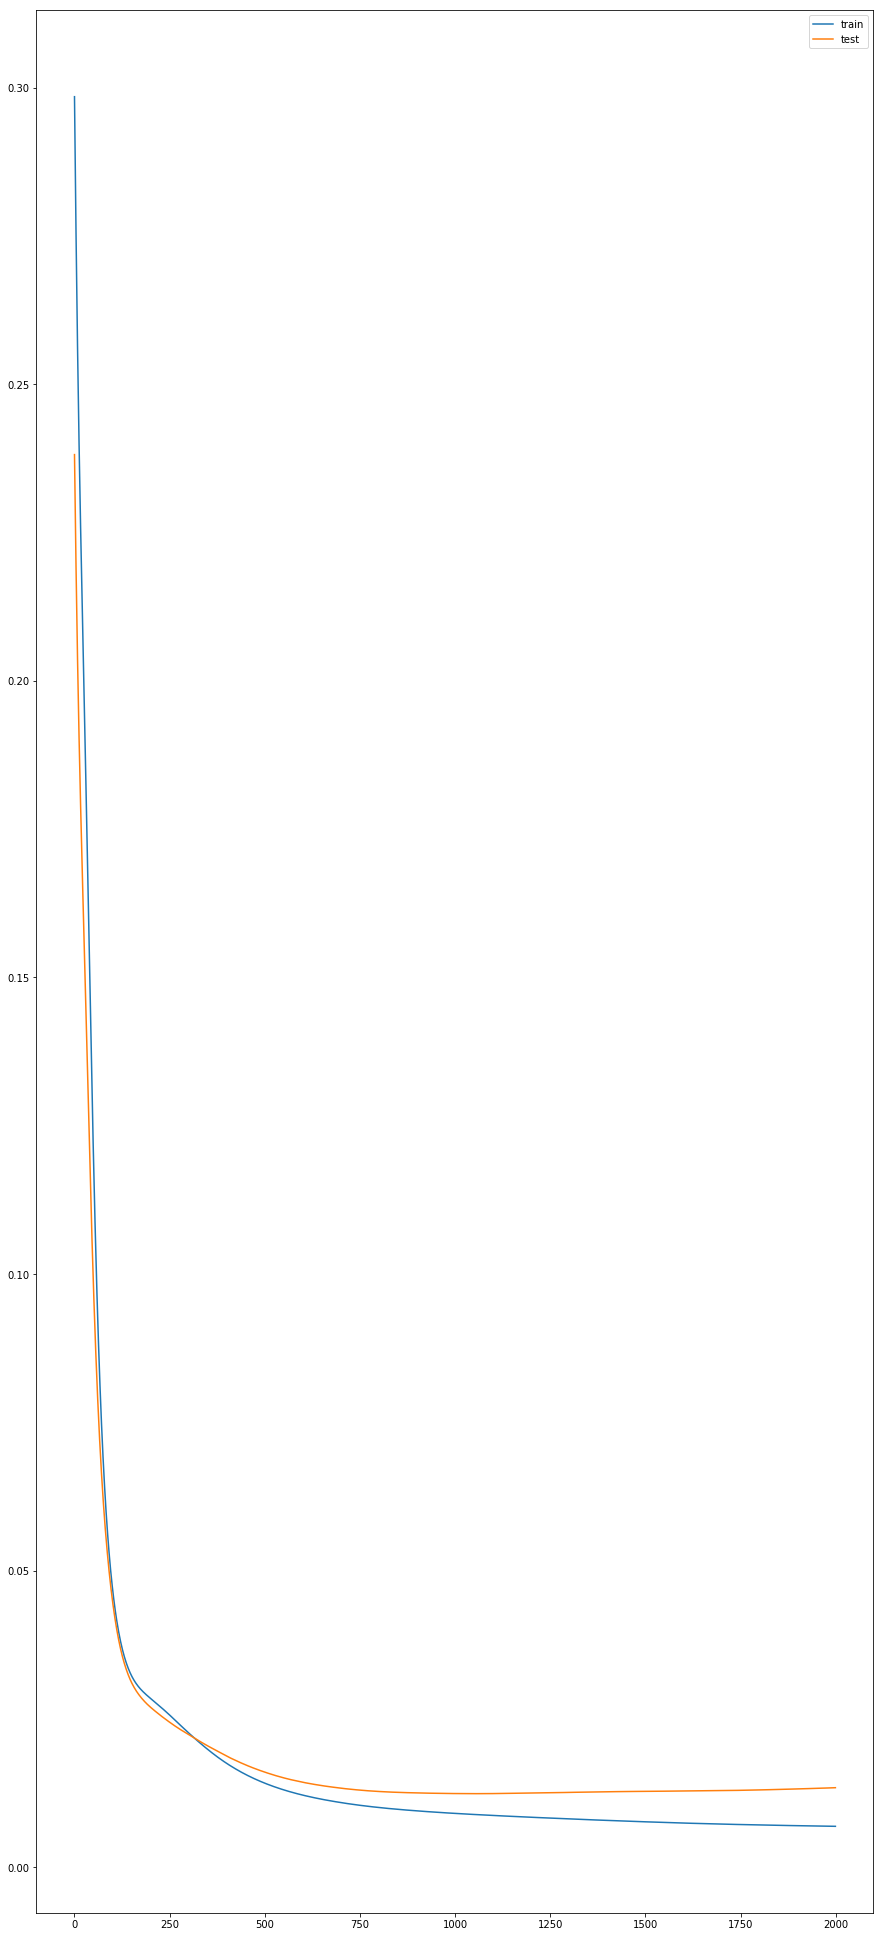

In [14]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [15]:
# design network
rmsprop_model = Sequential()
rmsprop_model.add(LSTM(2, input_shape=(in_training_values.shape[1], in_training_values.shape[2])))
rmsprop_model.add(Dense(14))

rmsprop_model.compile(loss='mean_squared_error', optimizer='rmsprop')
# fit network
history = rmsprop_model.fit(in_training_values, out_training_values, epochs=2000, batch_size=int(len(in_training_values)*0.5), validation_data=(in_test_values, out_test_values), verbose=2, shuffle=False)

Train on 199 samples, validate on 128 samples
Epoch 1/2000
0s - loss: 0.2671 - val_loss: 0.2084
Epoch 2/2000
0s - loss: 0.2592 - val_loss: 0.2039
Epoch 3/2000
0s - loss: 0.2540 - val_loss: 0.2002
Epoch 4/2000
0s - loss: 0.2497 - val_loss: 0.1969
Epoch 5/2000
0s - loss: 0.2458 - val_loss: 0.1937
Epoch 6/2000
0s - loss: 0.2422 - val_loss: 0.1907
Epoch 7/2000
0s - loss: 0.2387 - val_loss: 0.1878
Epoch 8/2000
0s - loss: 0.2354 - val_loss: 0.1849
Epoch 9/2000
0s - loss: 0.2321 - val_loss: 0.1820
Epoch 10/2000
0s - loss: 0.2288 - val_loss: 0.1792
Epoch 11/2000
0s - loss: 0.2256 - val_loss: 0.1764
Epoch 12/2000
0s - loss: 0.2225 - val_loss: 0.1737
Epoch 13/2000
0s - loss: 0.2193 - val_loss: 0.1709
Epoch 14/2000
0s - loss: 0.2161 - val_loss: 0.1681
Epoch 15/2000
0s - loss: 0.2130 - val_loss: 0.1654
Epoch 16/2000
0s - loss: 0.2098 - val_loss: 0.1626
Epoch 17/2000
0s - loss: 0.2066 - val_loss: 0.1598
Epoch 18/2000
0s - loss: 0.2034 - val_loss: 0.1571
Epoch 19/2000
0s - loss: 0.2001 - val_loss: 0

0s - loss: 0.0317 - val_loss: 0.0264
Epoch 170/2000
0s - loss: 0.0317 - val_loss: 0.0264
Epoch 171/2000
0s - loss: 0.0317 - val_loss: 0.0263
Epoch 172/2000
0s - loss: 0.0317 - val_loss: 0.0263
Epoch 173/2000
0s - loss: 0.0316 - val_loss: 0.0262
Epoch 174/2000
0s - loss: 0.0316 - val_loss: 0.0262
Epoch 175/2000
0s - loss: 0.0316 - val_loss: 0.0261
Epoch 176/2000
0s - loss: 0.0316 - val_loss: 0.0261
Epoch 177/2000
0s - loss: 0.0316 - val_loss: 0.0261
Epoch 178/2000
0s - loss: 0.0315 - val_loss: 0.0260
Epoch 179/2000
0s - loss: 0.0315 - val_loss: 0.0260
Epoch 180/2000
0s - loss: 0.0315 - val_loss: 0.0259
Epoch 181/2000
0s - loss: 0.0315 - val_loss: 0.0259
Epoch 182/2000
0s - loss: 0.0314 - val_loss: 0.0258
Epoch 183/2000
0s - loss: 0.0314 - val_loss: 0.0258
Epoch 184/2000
0s - loss: 0.0314 - val_loss: 0.0257
Epoch 185/2000
0s - loss: 0.0314 - val_loss: 0.0257
Epoch 186/2000
0s - loss: 0.0314 - val_loss: 0.0257
Epoch 187/2000
0s - loss: 0.0313 - val_loss: 0.0256
Epoch 188/2000
0s - loss: 0

0s - loss: 0.0264 - val_loss: 0.0200
Epoch 333/2000
0s - loss: 0.0263 - val_loss: 0.0199
Epoch 334/2000
0s - loss: 0.0263 - val_loss: 0.0199
Epoch 335/2000
0s - loss: 0.0262 - val_loss: 0.0198
Epoch 336/2000
0s - loss: 0.0262 - val_loss: 0.0198
Epoch 337/2000
0s - loss: 0.0261 - val_loss: 0.0198
Epoch 338/2000
0s - loss: 0.0261 - val_loss: 0.0197
Epoch 339/2000
0s - loss: 0.0261 - val_loss: 0.0197
Epoch 340/2000
0s - loss: 0.0260 - val_loss: 0.0197
Epoch 341/2000
0s - loss: 0.0260 - val_loss: 0.0196
Epoch 342/2000
0s - loss: 0.0259 - val_loss: 0.0196
Epoch 343/2000
0s - loss: 0.0259 - val_loss: 0.0196
Epoch 344/2000
0s - loss: 0.0259 - val_loss: 0.0195
Epoch 345/2000
0s - loss: 0.0258 - val_loss: 0.0195
Epoch 346/2000
0s - loss: 0.0258 - val_loss: 0.0195
Epoch 347/2000
0s - loss: 0.0258 - val_loss: 0.0195
Epoch 348/2000
0s - loss: 0.0257 - val_loss: 0.0194
Epoch 349/2000
0s - loss: 0.0257 - val_loss: 0.0194
Epoch 350/2000
0s - loss: 0.0257 - val_loss: 0.0194
Epoch 351/2000
0s - loss: 0

0s - loss: 0.0200 - val_loss: 0.0152
Epoch 498/2000
0s - loss: 0.0200 - val_loss: 0.0151
Epoch 499/2000
0s - loss: 0.0199 - val_loss: 0.0151
Epoch 500/2000
0s - loss: 0.0199 - val_loss: 0.0151
Epoch 501/2000
0s - loss: 0.0198 - val_loss: 0.0151
Epoch 502/2000
0s - loss: 0.0198 - val_loss: 0.0150
Epoch 503/2000
0s - loss: 0.0198 - val_loss: 0.0150
Epoch 504/2000
0s - loss: 0.0197 - val_loss: 0.0150
Epoch 505/2000
0s - loss: 0.0197 - val_loss: 0.0150
Epoch 506/2000
0s - loss: 0.0197 - val_loss: 0.0149
Epoch 507/2000
0s - loss: 0.0196 - val_loss: 0.0149
Epoch 508/2000
0s - loss: 0.0196 - val_loss: 0.0149
Epoch 509/2000
0s - loss: 0.0196 - val_loss: 0.0149
Epoch 510/2000
0s - loss: 0.0195 - val_loss: 0.0148
Epoch 511/2000
0s - loss: 0.0195 - val_loss: 0.0148
Epoch 512/2000
0s - loss: 0.0194 - val_loss: 0.0148
Epoch 513/2000
0s - loss: 0.0194 - val_loss: 0.0148
Epoch 514/2000
0s - loss: 0.0194 - val_loss: 0.0148
Epoch 515/2000
0s - loss: 0.0193 - val_loss: 0.0147
Epoch 516/2000
0s - loss: 0

0s - loss: 0.0147 - val_loss: 0.0123
Epoch 667/2000
0s - loss: 0.0146 - val_loss: 0.0123
Epoch 668/2000
0s - loss: 0.0146 - val_loss: 0.0123
Epoch 669/2000
0s - loss: 0.0146 - val_loss: 0.0123
Epoch 670/2000
0s - loss: 0.0146 - val_loss: 0.0123
Epoch 671/2000
0s - loss: 0.0145 - val_loss: 0.0123
Epoch 672/2000
0s - loss: 0.0145 - val_loss: 0.0123
Epoch 673/2000
0s - loss: 0.0145 - val_loss: 0.0123
Epoch 674/2000
0s - loss: 0.0145 - val_loss: 0.0123
Epoch 675/2000
0s - loss: 0.0144 - val_loss: 0.0122
Epoch 676/2000
0s - loss: 0.0144 - val_loss: 0.0122
Epoch 677/2000
0s - loss: 0.0144 - val_loss: 0.0122
Epoch 678/2000
0s - loss: 0.0144 - val_loss: 0.0122
Epoch 679/2000
0s - loss: 0.0143 - val_loss: 0.0122
Epoch 680/2000
0s - loss: 0.0143 - val_loss: 0.0122
Epoch 681/2000
0s - loss: 0.0143 - val_loss: 0.0122
Epoch 682/2000
0s - loss: 0.0143 - val_loss: 0.0122
Epoch 683/2000
0s - loss: 0.0142 - val_loss: 0.0122
Epoch 684/2000
0s - loss: 0.0142 - val_loss: 0.0122
Epoch 685/2000
0s - loss: 0

0s - loss: 0.0113 - val_loss: 0.0117
Epoch 836/2000
0s - loss: 0.0113 - val_loss: 0.0117
Epoch 837/2000
0s - loss: 0.0113 - val_loss: 0.0117
Epoch 838/2000
0s - loss: 0.0113 - val_loss: 0.0117
Epoch 839/2000
0s - loss: 0.0112 - val_loss: 0.0117
Epoch 840/2000
0s - loss: 0.0112 - val_loss: 0.0117
Epoch 841/2000
0s - loss: 0.0112 - val_loss: 0.0117
Epoch 842/2000
0s - loss: 0.0112 - val_loss: 0.0117
Epoch 843/2000
0s - loss: 0.0112 - val_loss: 0.0117
Epoch 844/2000
0s - loss: 0.0112 - val_loss: 0.0117
Epoch 845/2000
0s - loss: 0.0112 - val_loss: 0.0117
Epoch 846/2000
0s - loss: 0.0111 - val_loss: 0.0117
Epoch 847/2000
0s - loss: 0.0111 - val_loss: 0.0117
Epoch 848/2000
0s - loss: 0.0111 - val_loss: 0.0117
Epoch 849/2000
0s - loss: 0.0111 - val_loss: 0.0117
Epoch 850/2000
0s - loss: 0.0111 - val_loss: 0.0117
Epoch 851/2000
0s - loss: 0.0111 - val_loss: 0.0117
Epoch 852/2000
0s - loss: 0.0111 - val_loss: 0.0117
Epoch 853/2000
0s - loss: 0.0110 - val_loss: 0.0117
Epoch 854/2000
0s - loss: 0

0s - loss: 0.0096 - val_loss: 0.0122
Epoch 1005/2000
0s - loss: 0.0095 - val_loss: 0.0122
Epoch 1006/2000
0s - loss: 0.0095 - val_loss: 0.0122
Epoch 1007/2000
0s - loss: 0.0095 - val_loss: 0.0122
Epoch 1008/2000
0s - loss: 0.0095 - val_loss: 0.0122
Epoch 1009/2000
0s - loss: 0.0095 - val_loss: 0.0122
Epoch 1010/2000
0s - loss: 0.0095 - val_loss: 0.0122
Epoch 1011/2000
0s - loss: 0.0095 - val_loss: 0.0123
Epoch 1012/2000
0s - loss: 0.0095 - val_loss: 0.0123
Epoch 1013/2000
0s - loss: 0.0095 - val_loss: 0.0123
Epoch 1014/2000
0s - loss: 0.0095 - val_loss: 0.0123
Epoch 1015/2000
0s - loss: 0.0095 - val_loss: 0.0123
Epoch 1016/2000
0s - loss: 0.0095 - val_loss: 0.0123
Epoch 1017/2000
0s - loss: 0.0095 - val_loss: 0.0123
Epoch 1018/2000
0s - loss: 0.0095 - val_loss: 0.0123
Epoch 1019/2000
0s - loss: 0.0095 - val_loss: 0.0123
Epoch 1020/2000
0s - loss: 0.0094 - val_loss: 0.0123
Epoch 1021/2000
0s - loss: 0.0094 - val_loss: 0.0123
Epoch 1022/2000
0s - loss: 0.0094 - val_loss: 0.0123
Epoch 102

0s - loss: 0.0087 - val_loss: 0.0129
Epoch 1173/2000
0s - loss: 0.0087 - val_loss: 0.0129
Epoch 1174/2000
0s - loss: 0.0087 - val_loss: 0.0129
Epoch 1175/2000
0s - loss: 0.0087 - val_loss: 0.0129
Epoch 1176/2000
0s - loss: 0.0087 - val_loss: 0.0129
Epoch 1177/2000
0s - loss: 0.0087 - val_loss: 0.0129
Epoch 1178/2000
0s - loss: 0.0087 - val_loss: 0.0130
Epoch 1179/2000
0s - loss: 0.0087 - val_loss: 0.0130
Epoch 1180/2000
0s - loss: 0.0087 - val_loss: 0.0130
Epoch 1181/2000
0s - loss: 0.0087 - val_loss: 0.0130
Epoch 1182/2000
0s - loss: 0.0087 - val_loss: 0.0130
Epoch 1183/2000
0s - loss: 0.0087 - val_loss: 0.0130
Epoch 1184/2000
0s - loss: 0.0087 - val_loss: 0.0130
Epoch 1185/2000
0s - loss: 0.0087 - val_loss: 0.0130
Epoch 1186/2000
0s - loss: 0.0087 - val_loss: 0.0130
Epoch 1187/2000
0s - loss: 0.0087 - val_loss: 0.0130
Epoch 1188/2000
0s - loss: 0.0087 - val_loss: 0.0130
Epoch 1189/2000
0s - loss: 0.0087 - val_loss: 0.0130
Epoch 1190/2000
0s - loss: 0.0087 - val_loss: 0.0130
Epoch 119

0s - loss: 0.0083 - val_loss: 0.0135
Epoch 1338/2000
0s - loss: 0.0083 - val_loss: 0.0135
Epoch 1339/2000
0s - loss: 0.0083 - val_loss: 0.0135
Epoch 1340/2000
0s - loss: 0.0083 - val_loss: 0.0135
Epoch 1341/2000
0s - loss: 0.0083 - val_loss: 0.0135
Epoch 1342/2000
0s - loss: 0.0083 - val_loss: 0.0135
Epoch 1343/2000
0s - loss: 0.0083 - val_loss: 0.0135
Epoch 1344/2000
0s - loss: 0.0083 - val_loss: 0.0135
Epoch 1345/2000
0s - loss: 0.0083 - val_loss: 0.0135
Epoch 1346/2000
0s - loss: 0.0083 - val_loss: 0.0135
Epoch 1347/2000
0s - loss: 0.0083 - val_loss: 0.0135
Epoch 1348/2000
0s - loss: 0.0083 - val_loss: 0.0135
Epoch 1349/2000
0s - loss: 0.0083 - val_loss: 0.0135
Epoch 1350/2000
0s - loss: 0.0083 - val_loss: 0.0135
Epoch 1351/2000
0s - loss: 0.0083 - val_loss: 0.0135
Epoch 1352/2000
0s - loss: 0.0083 - val_loss: 0.0135
Epoch 1353/2000
0s - loss: 0.0083 - val_loss: 0.0135
Epoch 1354/2000
0s - loss: 0.0083 - val_loss: 0.0135
Epoch 1355/2000
0s - loss: 0.0083 - val_loss: 0.0135
Epoch 135

0s - loss: 0.0080 - val_loss: 0.0139
Epoch 1508/2000
0s - loss: 0.0080 - val_loss: 0.0139
Epoch 1509/2000
0s - loss: 0.0080 - val_loss: 0.0139
Epoch 1510/2000
0s - loss: 0.0080 - val_loss: 0.0139
Epoch 1511/2000
0s - loss: 0.0080 - val_loss: 0.0139
Epoch 1512/2000
0s - loss: 0.0080 - val_loss: 0.0139
Epoch 1513/2000
0s - loss: 0.0080 - val_loss: 0.0139
Epoch 1514/2000
0s - loss: 0.0080 - val_loss: 0.0139
Epoch 1515/2000
0s - loss: 0.0080 - val_loss: 0.0140
Epoch 1516/2000
0s - loss: 0.0080 - val_loss: 0.0140
Epoch 1517/2000
0s - loss: 0.0080 - val_loss: 0.0140
Epoch 1518/2000
0s - loss: 0.0080 - val_loss: 0.0140
Epoch 1519/2000
0s - loss: 0.0080 - val_loss: 0.0140
Epoch 1520/2000
0s - loss: 0.0080 - val_loss: 0.0140
Epoch 1521/2000
0s - loss: 0.0080 - val_loss: 0.0140
Epoch 1522/2000
0s - loss: 0.0080 - val_loss: 0.0140
Epoch 1523/2000
0s - loss: 0.0080 - val_loss: 0.0140
Epoch 1524/2000
0s - loss: 0.0080 - val_loss: 0.0140
Epoch 1525/2000
0s - loss: 0.0080 - val_loss: 0.0140
Epoch 152

0s - loss: 0.0078 - val_loss: 0.0144
Epoch 1677/2000
0s - loss: 0.0078 - val_loss: 0.0144
Epoch 1678/2000
0s - loss: 0.0078 - val_loss: 0.0144
Epoch 1679/2000
0s - loss: 0.0078 - val_loss: 0.0144
Epoch 1680/2000
0s - loss: 0.0078 - val_loss: 0.0144
Epoch 1681/2000
0s - loss: 0.0078 - val_loss: 0.0144
Epoch 1682/2000
0s - loss: 0.0078 - val_loss: 0.0144
Epoch 1683/2000
0s - loss: 0.0078 - val_loss: 0.0144
Epoch 1684/2000
0s - loss: 0.0078 - val_loss: 0.0144
Epoch 1685/2000
0s - loss: 0.0078 - val_loss: 0.0144
Epoch 1686/2000
0s - loss: 0.0078 - val_loss: 0.0144
Epoch 1687/2000
0s - loss: 0.0078 - val_loss: 0.0144
Epoch 1688/2000
0s - loss: 0.0078 - val_loss: 0.0144
Epoch 1689/2000
0s - loss: 0.0078 - val_loss: 0.0144
Epoch 1690/2000
0s - loss: 0.0078 - val_loss: 0.0144
Epoch 1691/2000
0s - loss: 0.0078 - val_loss: 0.0144
Epoch 1692/2000
0s - loss: 0.0078 - val_loss: 0.0144
Epoch 1693/2000
0s - loss: 0.0078 - val_loss: 0.0144
Epoch 1694/2000
0s - loss: 0.0078 - val_loss: 0.0144
Epoch 169

0s - loss: 0.0077 - val_loss: 0.0147
Epoch 1846/2000
0s - loss: 0.0077 - val_loss: 0.0147
Epoch 1847/2000
0s - loss: 0.0077 - val_loss: 0.0147
Epoch 1848/2000
0s - loss: 0.0077 - val_loss: 0.0147
Epoch 1849/2000
0s - loss: 0.0077 - val_loss: 0.0147
Epoch 1850/2000
0s - loss: 0.0077 - val_loss: 0.0147
Epoch 1851/2000
0s - loss: 0.0077 - val_loss: 0.0147
Epoch 1852/2000
0s - loss: 0.0077 - val_loss: 0.0147
Epoch 1853/2000
0s - loss: 0.0077 - val_loss: 0.0147
Epoch 1854/2000
0s - loss: 0.0077 - val_loss: 0.0147
Epoch 1855/2000
0s - loss: 0.0077 - val_loss: 0.0147
Epoch 1856/2000
0s - loss: 0.0077 - val_loss: 0.0147
Epoch 1857/2000
0s - loss: 0.0077 - val_loss: 0.0147
Epoch 1858/2000
0s - loss: 0.0077 - val_loss: 0.0147
Epoch 1859/2000
0s - loss: 0.0077 - val_loss: 0.0147
Epoch 1860/2000
0s - loss: 0.0077 - val_loss: 0.0147
Epoch 1861/2000
0s - loss: 0.0077 - val_loss: 0.0147
Epoch 1862/2000
0s - loss: 0.0076 - val_loss: 0.0147
Epoch 1863/2000
0s - loss: 0.0077 - val_loss: 0.0147
Epoch 186

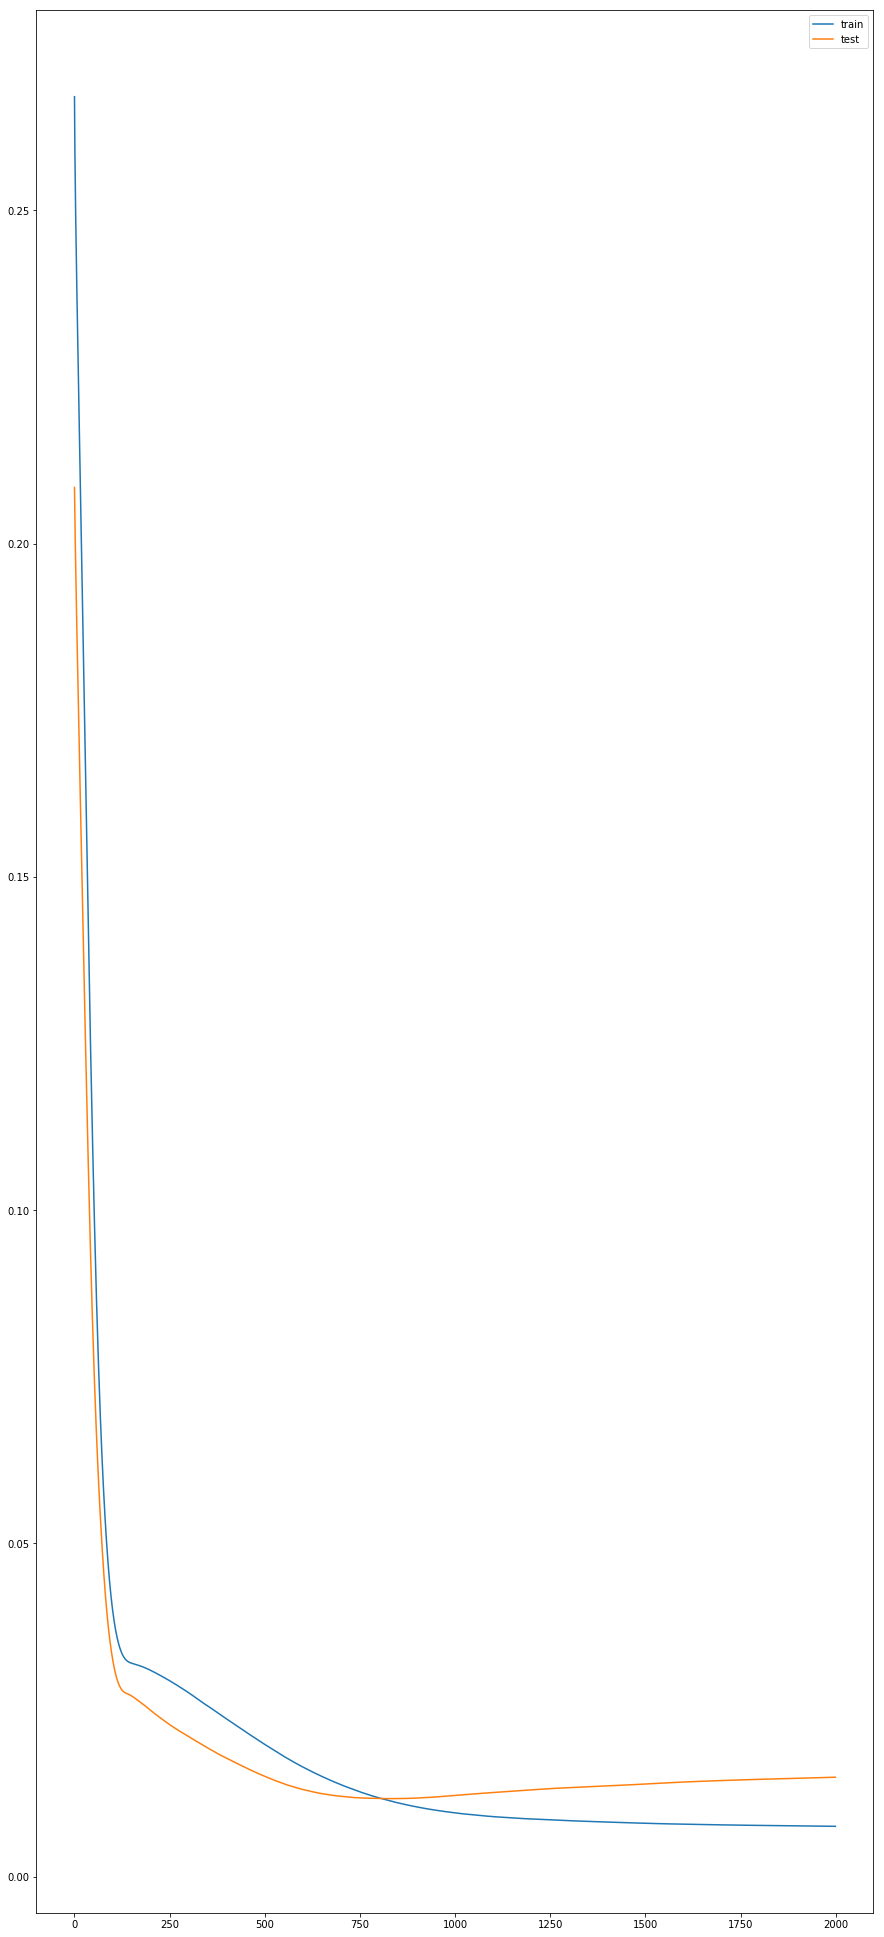

In [16]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Evaluate Models and compare

After the model is fit, we can forecast for the entire test dataset.


In [17]:
# make a prediction
yhat = sgd_model.predict(in_test_values)

#invert the normalization to bring it back to its original units
inv_yhat = scaler.inverse_transform(yhat)
inv_yhat = DataFrame(inv_yhat, columns=out_training_df.columns)

display(inv_yhat)

,out1,out2,out3,out4,out5,out6,out7,out8,out9,out10,out11,out12,out13,out14
0,15131.199219,50.538021,8430.184570,48.663879,6228.319336,47.367374,4111.307617,45.398319,1908.195557,41.508461,942.451050,37.851837,488.660248,34.137764
1,13713.232422,50.845249,7387.565430,48.404202,4777.564453,47.248940,2627.501221,45.663479,1242.586670,42.358124,658.556335,38.585114,381.295715,35.435673
2,13924.567383,50.417191,7287.337402,48.201317,4794.846680,46.868557,2442.473877,45.343807,1122.696655,41.757473,577.927856,38.495468,333.933411,35.189114
3,12300.139648,52.278419,7006.443359,50.156490,5073.959961,49.202518,3457.091309,47.473850,1766.398315,43.857555,928.911682,39.638283,512.906555,36.108036
4,13483.691406,51.501080,7300.945801,49.376595,5329.511230,48.297302,3594.394043,46.416195,1734.866455,42.878048,905.066040,38.852894,479.664551,35.273605
5,13866.903320,50.898682,7515.269043,48.623444,5081.096191,47.452080,3001.364014,45.766930,1419.385498,42.302410,738.161682,38.539059,412.377747,35.221764
6,13895.572266,50.993095,7280.262207,49.126648,5334.164551,47.934464,3554.479980,46.028915,1652.992432,42.255135,849.635620,38.622150,448.838837,34.941158
7,11073.280273,52.861526,6014.604492,50.589802,4343.100586,49.721645,2917.260742,48.093651,1555.345337,44.683067,855.659912,40.392250,477.690094,36.900528
8,13020.191406,51.442368,6865.869629,49.273567,4818.926758,48.170448,3014.838135,46.448952,1459.059692,42.939518,774.121887,39.119949,425.065369,35.651901
9,11420.732422,52.313778,5128.933594,50.071102,3819.848877,49.126999,2624.470703,47.302811,1290.973633,44.118015,750.121521,40.122887,393.374573,36.511402


In [18]:
# make a prediction
yhat = sgd_model.predict(in_test_values)

#invert the normalization to bring it back to its original units
inv_yhat = scaler.inverse_transform(yhat)
inv_yhat = DataFrame(inv_yhat, columns=out_training_df.columns)

display(inv_yhat)

,out1,out2,out3,out4,out5,out6,out7,out8,out9,out10,out11,out12,out13,out14
0,15131.199219,50.538021,8430.184570,48.663879,6228.319336,47.367374,4111.307617,45.398319,1908.195557,41.508461,942.451050,37.851837,488.660248,34.137764
1,13713.232422,50.845249,7387.565430,48.404202,4777.564453,47.248940,2627.501221,45.663479,1242.586670,42.358124,658.556335,38.585114,381.295715,35.435673
2,13924.567383,50.417191,7287.337402,48.201317,4794.846680,46.868557,2442.473877,45.343807,1122.696655,41.757473,577.927856,38.495468,333.933411,35.189114
3,12300.139648,52.278419,7006.443359,50.156490,5073.959961,49.202518,3457.091309,47.473850,1766.398315,43.857555,928.911682,39.638283,512.906555,36.108036
4,13483.691406,51.501080,7300.945801,49.376595,5329.511230,48.297302,3594.394043,46.416195,1734.866455,42.878048,905.066040,38.852894,479.664551,35.273605
5,13866.903320,50.898682,7515.269043,48.623444,5081.096191,47.452080,3001.364014,45.766930,1419.385498,42.302410,738.161682,38.539059,412.377747,35.221764
6,13895.572266,50.993095,7280.262207,49.126648,5334.164551,47.934464,3554.479980,46.028915,1652.992432,42.255135,849.635620,38.622150,448.838837,34.941158
7,11073.280273,52.861526,6014.604492,50.589802,4343.100586,49.721645,2917.260742,48.093651,1555.345337,44.683067,855.659912,40.392250,477.690094,36.900528
8,13020.191406,51.442368,6865.869629,49.273567,4818.926758,48.170448,3014.838135,46.448952,1459.059692,42.939518,774.121887,39.119949,425.065369,35.651901
9,11420.732422,52.313778,5128.933594,50.071102,3819.848877,49.126999,2624.470703,47.302811,1290.973633,44.118015,750.121521,40.122887,393.374573,36.511402


In [19]:
# make a prediction
yhat = rmsprop_model.predict(in_test_values)

#invert the normalization to bring it back to its original units
inv_yhat = scaler.inverse_transform(yhat)
inv_yhat = DataFrame(inv_yhat, columns=out_training_df.columns)

display(inv_yhat)

,out1,out2,out3,out4,out5,out6,out7,out8,out9,out10,out11,out12,out13,out14
0,15278.253906,49.888149,9315.216797,47.460968,5610.499512,46.299557,3111.941162,44.537769,1416.178345,41.137569,699.253906,37.130039,450.947845,34.215393
1,12979.938477,50.906342,7380.722656,48.411877,4284.766113,47.388710,2218.634033,45.841576,1064.228271,42.608727,577.045715,38.624668,389.355194,35.698284
2,13548.284180,50.378613,7643.029785,47.892429,4353.214844,46.799313,2174.087891,45.155346,985.497131,41.945469,527.741577,38.082352,367.864868,35.164619
3,12367.725586,51.691040,7267.475586,49.194180,4414.283691,48.274399,2474.617188,46.865841,1278.923706,43.557823,692.468445,39.344170,441.278107,36.403965
4,13624.414062,50.840580,8095.241699,48.371628,4863.078613,47.338181,2680.515869,45.765690,1294.923218,42.434666,674.642822,38.343094,435.869171,35.415424
5,13695.494141,50.710327,8077.740723,48.240471,4811.246094,47.189949,2613.140137,45.595158,1246.481812,42.281994,649.960815,38.235054,424.631622,35.309803
6,14740.652344,50.354752,9041.581055,47.918739,5515.121094,46.819279,3122.729736,45.143913,1471.074829,41.729588,736.499695,37.622623,466.939148,34.700470
7,11501.643555,52.405430,6797.432129,49.893223,4225.555664,49.068394,2456.105469,47.793152,1344.949341,44.471077,741.719055,40.114372,462.075073,37.162861
8,12819.398438,51.046886,7299.950684,48.549816,4257.414551,47.545311,2223.012695,46.024174,1081.343872,42.786819,588.514709,38.772514,394.290619,35.843868
9,11969.248047,51.749683,6839.769043,49.237595,4073.616455,48.326500,2206.333984,46.936466,1147.086914,43.684956,637.306335,39.529518,414.911438,36.589737


In [20]:
sgd_loss = sgd_model.evaluate(in_test_values, out_test_values, verbose=0)
adam_loss = adam_model.evaluate(in_test_values, out_test_values, verbose=0)
rmsprop_loss = rmsprop_model.evaluate(in_test_values, out_test_values, verbose=0)

print("SGD:",sgd_loss)
print("ADAM:", adam_loss)
print("RMSPROP:", rmsprop_loss)

SGD: 0.0169743406586349
ADAM: 0.013392293360084295
RMSPROP: 0.014926631236448884
